In [1]:
import pandas as pd
import statsmodels.api as sm

# 1. 데이터 불러오기
df = pd.read_excel("월별_통합데이터.xlsx")
data = pd.read_excel("관광객수.xlsx")

df["평균교통이용횟수"] = (
    df["1주간 평균 대중교통 이용횟수(4회~5회)"] * 4.5 +
    df["1주간 평균 대중교통 이용횟수(6회~10회)"] * 8 +
    df["1주간 평균 대중교통 이용횟수(11회~15회)"] * 13 +
    df["1주간 평균 대중교통 이용횟수(16회~20회)"] * 18 +
    df["1주간 평균 대중교통 이용횟수(21회이상)"] * 22
) / (
    df["1주간 평균 대중교통 이용횟수(4회~5회)"] +
    df["1주간 평균 대중교통 이용횟수(6회~10회)"] +
    df["1주간 평균 대중교통 이용횟수(11회~15회)"] +
    df["1주간 평균 대중교통 이용횟수(16회~20회)"] +
    df["1주간 평균 대중교통 이용횟수(21회이상)"]
)

df = df.drop(["1주간 평균 대중교통 이용횟수(4회~5회)","1주간 평균 대중교통 이용횟수(6회~10회)","1주간 평균 대중교통 이용횟수(11회~15회)","1주간 평균 대중교통 이용횟수(16회~20회)","1주간 평균 대중교통 이용횟수(21회이상)","세종축제_구글","세종축제_네이버","세종한글축제_네이버","세종수목원_네이버","세종한글축제_구글","세종수목원_구글"],axis = 1)
df

,구분,날짜,예산,세종축제_통합,세종한글축제_통합,세종수목원_통합,평균기온,월합강수량(00~24h만),평균상대습도(%),평균교통이용횟수
0,세종,2019-01-01,1.070000e+09,0.000000,0.840929,NaN,2.1,26.5,65,7.475000
1,세종,2019-02-01,1.070000e+09,0.000000,0.000000,NaN,2.9,81.3,65,7.475000
2,세종,2019-03-01,1.070000e+09,0.000000,0.079390,NaN,7.8,89.7,52,7.475000
3,세종,2019-04-01,1.070000e+09,0.000000,0.258012,NaN,10.8,22.6,48,7.475000
4,세종,2019-05-01,1.070000e+09,0.000000,0.468248,NaN,18.2,17.6,67,7.475000
...,...,...,...,...,...,...,...,...,...,...
75,NaN,2025-04-01,NaN,26.426823,1.687544,43.184798,13.4,72.4,60,8.718213
76,NaN,2025-05-01,NaN,16.721758,0.525964,62.185981,17.1,78.5,70,8.718213
77,NaN,2025-06-01,NaN,9.025235,0.525964,40.301978,23.1,222.9,73,8.718213
78,NaN,2025-07-01,NaN,14.195388,4.640746,23.165250,27.5,278.9,75,8.718213


In [2]:
data

,기준년월,방문자수
0,201901,1993420
1,201902,1993420
2,201903,1993420
3,201904,1993420
4,201905,1993420
...,...,...
75,202504,2242635
76,202505,2863542
77,202506,2409795
78,202507,2489851


In [33]:


X = df[["평균기온", "예산", "세종축제_통합","세종한글축제_통합","세종수목원_통합" ,"평균교통이용횟수"]]
y = data["방문자수"]

X = X.fillna(0) 

print(y.index[:10])
print(X.index[:10])


RangeIndex(start=0, stop=10, step=1)
RangeIndex(start=0, stop=10, step=1)


In [35]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [37]:
print(X.shape)   # (샘플 수, 변수 수)
print(y.shape)   # (샘플 수,)

(80, 6)
(80,)


In [39]:
model = sm.OLS(y.values, X.values).fit()

In [41]:
# 3. 상수항 추가 (회귀모형 절편)
X = sm.add_constant(X)

# 4. 회귀분석 실행 (OLS)
model = sm.OLS(y, X).fit()

# 5. 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   방문자수   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     12.52
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           1.18e-09
Time:                        14:18:32   Log-Likelihood:                -1069.4
No. Observations:                  80   AIC:                             2153.
Df Residuals:                      73   BIC:                             2169.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.81e+06   2.43e+05      7.452      0.0

In [13]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 4. VIF 계산
vif_df = pd.DataFrame()
vif_df["변수"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)


          변수       VIF
0       평균기온  3.036965
1    세종축제_통합  1.253517
2  세종한글축제_통합  1.425660
3   평균교통이용횟수  3.656899


In [15]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 데이터프레임으로 변환 (컬럼명 유지)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# 5. 상수항 추가 (⚠️ 여기서 한 번만 추가!)
X_scaled = sm.add_constant(X_scaled, has_constant="add")

# 6. 회귀모형 적합
model = sm.OLS(y, X_scaled).fit()

# 7. 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   방문자수   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     9.454
Date:                Mon, 29 Sep 2025   Prob (F-statistic):           3.04e-06
Time:                        14:14:52   Log-Likelihood:                -1081.4
No. Observations:                  80   AIC:                             2173.
Df Residuals:                      75   BIC:                             2185.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.19e+06   2.07e+04    105.593      0.0

In [17]:
print(X.head())

   평균기온  세종축제_통합  세종한글축제_통합  평균교통이용횟수
0   2.1      0.0   0.840929     7.475
1   2.9      0.0   0.000000     7.475
2   7.8      0.0   0.079390     7.475
3  10.8      0.0   0.258012     7.475
4  18.2      0.0   0.468248     7.475


In [43]:
import numpy as np
import pandas as pd

np.random.seed(42)

# 기본값
arboretum_visitors = 1_000_000
festival_visitors = 200_000
baseline_city_visitors = 1_000_000
n_sims = 10000

# 확률분포
participation_rates = np.random.uniform(0.01, 0.05, size=n_sims)
festival_conversion = np.random.uniform(0.05, 0.15, size=n_sims)
per_capita_spend = np.random.normal(80_000, 10_000, size=n_sims)

# 계산
delta_from_arboretum = arboretum_visitors * participation_rates
delta_from_festival = festival_visitors * festival_conversion
delta_total = delta_from_arboretum + delta_from_festival
economic_impact = delta_total * per_capita_spend

# 요약 통계
def summarize(arr):
    return {
        "평균": int(np.mean(arr)),
        "중앙값": int(np.median(arr)),
        "5%": int(np.percentile(arr, 5)),
        "95%": int(np.percentile(arr, 95))
    }

summary_delta = summarize(delta_total)
summary_econ = summarize(economic_impact)

print("추가 관광객(ΔY) 분포:", summary_delta)
print("경제 효과(E) 분포 (KRW):", summary_econ)


추가 관광객(ΔY) 분포: {'평균': 49856, '중앙값': 49643, '5%': 28976, '95%': 70976}
경제 효과(E) 분포 (KRW): {'평균': 3988295484, '중앙값': 3930389717, '5%': 2230708394, '95%': 5959864172}


C:\Users\hanse\AppData\Local\Temp\ipykernel_6004\691044003.py:12: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hanse\AppData\Local\Temp\ipykernel_6004\691044003.py:12: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hanse\AppData\Local\Temp\ipykernel_6004\691044003.py:12: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hanse\AppData\Local\Temp\ipykernel_6004\691044003.py:12: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hanse\AppData\Local\Temp\ipykernel_6004\691044003.py:12: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hanse\AppData\Local\Temp\ipykernel_6004\691044003.py:12: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) D

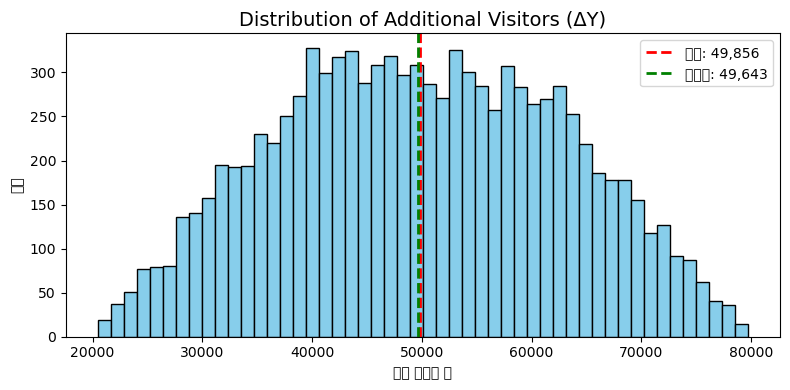

In [47]:
import matplotlib.pyplot as plt

# 추가 관광객 분포
plt.figure(figsize=(8,4))
plt.hist(delta_total, bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Additional Visitors (ΔY)", fontsize=14)
plt.xlabel("추가 관광객 수")
plt.ylabel("빈도")
plt.axvline(np.mean(delta_total), color="red", linestyle="dashed", linewidth=2, label=f"평균: {int(np.mean(delta_total)):,}")
plt.axvline(np.median(delta_total), color="green", linestyle="dashed", linewidth=2, label=f"중앙값: {int(np.median(delta_total)):,}")
plt.legend()
plt.tight_layout()
plt.show()




C:\Users\hanse\AppData\Local\Temp\ipykernel_6004\608398641.py:10: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hanse\AppData\Local\Temp\ipykernel_6004\608398641.py:10: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hanse\AppData\Local\Temp\ipykernel_6004\608398641.py:10: UserWarning: Glyph 54952 (\N{HANGUL SYLLABLE HYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hanse\AppData\Local\Temp\ipykernel_6004\608398641.py:10: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hanse\AppData\Local\Temp\ipykernel_6004\608398641.py:10: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\hanse\AppData\Local\Temp\ipykernel_6004\608398641.py:10: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s)

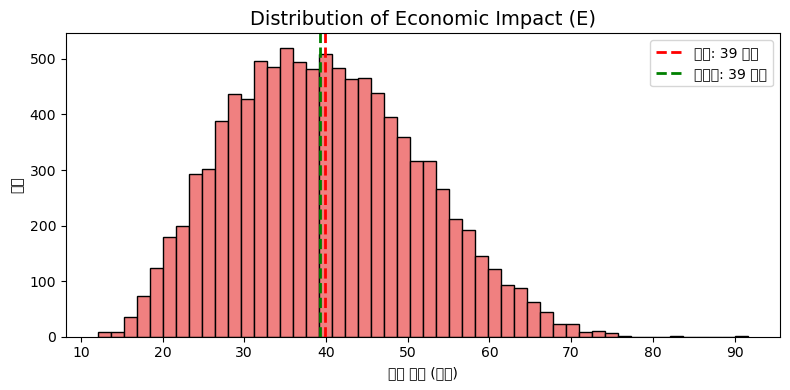

In [49]:
# 경제 효과 분포
plt.figure(figsize=(8,4))
plt.hist(economic_impact/1e8, bins=50, color="lightcoral", edgecolor="black")  # 억 단위 변환
plt.title("Distribution of Economic Impact (E)", fontsize=14)
plt.xlabel("경제 효과 (억원)")
plt.ylabel("빈도")
plt.axvline(np.mean(economic_impact/1e8), color="red", linestyle="dashed", linewidth=2, label=f"평균: {int(np.mean(economic_impact/1e8)):,} 억원")
plt.axvline(np.median(economic_impact/1e8), color="green", linestyle="dashed", linewidth=2, label=f"중앙값: {int(np.median(economic_impact/1e8)):,} 억원")
plt.legend()
plt.tight_layout()
plt.show()